<a href="https://colab.research.google.com/github/mpHarm88/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Mikio_Harman_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import ttest_1samp
import seaborn as sns

##Load and clean the data (or determine the best method to drop observations when running tests)

In [0]:
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [40]:

col_names = {0: 'class_name',
             1:'handicapped_infants',
             2:'water_project_cost_sharing',
             3:'adoption_of_the_budget_resolution',
             4:'physician_fee_freeze',
             5:'el_salvador_aid',
             6:'religious_groups_in_schoools',
             7:'anti_satellite_test_ban',
             8:'aid_to_nicaraguan_contras',
             9:'mx_missle',
            10:'immigration',
            11:'synfuels_corporation_cutback',
            12:'education_spending',
            13:'superfund_right_to_sue',
            14:'crime',
            15:'duty_free_exports',
            16:'export_administration_act_south_africa'}

df_data = pd.read_csv(url_data, header=None, names=col_names)
df_data2 = df_data.rename(columns=col_names)
df_data3 = df_data2.replace({'?':np.NaN, 'n':0, 'y':1})
df_data3.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schoools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missle,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df_filtered_d = df_data3[df_data3['class_name'] == 'democrat']
df_filtered_r = df_data3[df_data3['class_name'] == 'republican']

In [43]:
df_data3.isnull().sum()

class_name                                  0
handicapped_infants                        12
water_project_cost_sharing                 48
adoption_of_the_budget_resolution          11
physician_fee_freeze                       11
el_salvador_aid                            15
religious_groups_in_schoools               11
anti_satellite_test_ban                    14
aid_to_nicaraguan_contras                  15
mx_missle                                  22
immigration                                 7
synfuels_corporation_cutback               21
education_spending                         31
superfund_right_to_sue                     25
crime                                      17
duty_free_exports                          28
export_administration_act_south_africa    104
dtype: int64

#SAMPLE T TEST

In [23]:
df_filtered_r['adoption_of_the_budget_resolution'].mean()

0.13414634146341464

###1. Null Hypothesis:

In 1-sample t-tests YOU GET TO CHOOSE YOUR NULL HYPOTHESIS

$H_0$: 0.0 - There is ZERO republican support for this bill

###2. Alternative Hypothesis

$H_a$: $\bar{x} \neq 0$ - There is non support for the budget bill among republicans

###3. Confidence Level: 95% or .95

In [29]:
#Run a 1-sample t-test providing sample and null hypothesis
# pass nan_policy='omit' any time you have NaN values in a column

ttest_1samp(df_filtered_r['adoption_of_the_budget_resolution'],0,  nan_policy='omit')

Ttest_1sampResult(statistic=5.02528816355446, pvalue=1.3107521045196396e-06)

4. T-Statistic: 5.025
5. 0.0000013
---
Conclusion: Due to a p-value of 0 I reject the null hypothesis that republican support is zero and conclude that republican support is non-zero

# 2-Sample T-test

In [45]:
ttest_ind(df_filtered_r['adoption_of_the_budget_resolution'], 
          df_filtered_d['adoption_of_the_budget_resolution'], 
          nan_policy='omit')

Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)

In [33]:
df_filtered_r['adoption_of_the_budget_resolution'].mean()

0.13414634146341464

In [34]:
df_filtered_d['adoption_of_the_budget_resolution'].mean()

0.8884615384615384

##Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

In [44]:
ttest_ind(df_filtered_r['religious_groups_in_schoools'],
          df_filtered_d['religious_groups_in_schoools'],
          nan_policy='omit')

Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)

In [48]:
print(df_filtered_r['religious_groups_in_schoools'].mean())
print(df_filtered_d['religious_groups_in_schoools'].mean())

0.8975903614457831
0.47674418604651164


In [64]:
ttest_ind(df_filtered_d['crime'],
          df_filtered_r['crime'],
          nan_policy='omit')

Ttest_indResult(statistic=-16.342085656197696, pvalue=9.952342705606092e-47)

In [65]:
print(df_filtered_d['crime'].mean())
print(df_filtered_r['crime'].mean())

0.35019455252918286
0.9813664596273292


##Using hypothesis testing, find an issue that Democrats support more than democrats with p < 0.01

In [52]:
ttest_ind(df_filtered_d['synfuels_corporation_cutback'],
          df_filtered_r['synfuels_corporation_cutback'],
          nan_policy='omit')

Ttest_indResult(statistic=8.293603989407588, pvalue=1.5759322301054064e-15)

In [54]:
print(df_filtered_d['synfuels_corporation_cutback'].mean())
print(df_filtered_r['synfuels_corporation_cutback'].mean())

0.5058823529411764
0.1320754716981132


In [56]:
ttest_ind(df_filtered_d['mx_missle'],
          df_filtered_r['mx_missle'],
          nan_policy='omit')

Ttest_indResult(statistic=16.437503268542994, pvalue=5.03079265310811e-47)

In [57]:
print(df_filtered_d['mx_missle'].mean())
print(df_filtered_r['mx_missle'].mean())

0.7580645161290323
0.11515151515151516


###Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

In [59]:
ttest_ind(df_filtered_d['water_project_cost_sharing'],
          df_filtered_r['water_project_cost_sharing'],
          nan_policy='omit')

Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)

In [66]:
print(df_filtered_d['water_project_cost_sharing'].mean())
print(df_filtered_r['water_project_cost_sharing'].mean())

0.502092050209205
0.5067567567567568


##Additional Goals: 
I'm adding to the assignment that when you have already done what's asked of you there, before you move onto the other stretch goals, that:
You also practice some 1-sample t-tests
You try and create some kind of a visualization that communicates the results of your hypothesis tests. This can be as simple as a histogram of the p-values or the t-statistics.

###1 Sample T-Tests

In [83]:
df_filtered_r['el_salvador_aid'].mean()

0.9515151515151515

In [84]:
df_filtered_r['el_salvador_aid'].isnull().sum()

3

###1. Null Hypothesis:
$H_0$: 0.0 - There was no support by Republicans on this vote

##2. Alternative Hypothesis

$H_a$: $\bar{x} \neq 0$ - 

##3. Confidence Level: 
95% or 0.95

In [81]:
ttest_1samp(df_filtered_r['el_salvador_aid'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=56.73182528352142, pvalue=1.0573299896233442e-109)

##4. T-Statistic: 56.73
##5. p=Value of 1.05e-105

---
Conclusion: Since the p-Value is 0 the null-hypothesis is rejected that Republican support is zero and that Republican support is actually non-zero

In [94]:
print(df_filtered_r['el_salvador_aid'].isnull().sum())
print(df_filtered_r['el_salvador_aid'].shape)
print(df_filtered_r['el_salvador_aid'].mean())
print(df_filtered_r['el_salvador_aid'].std())

3
(168,)
0.9515151515151515
0.21544227357842619


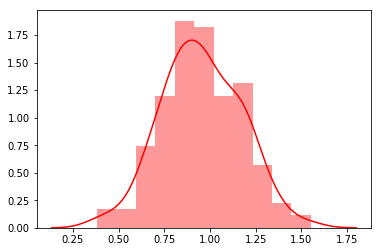

In [93]:
xbar1 = 0.958
s1 = 0.215
n1 = 165

esa_vote = np.random.normal(xbar1, s1, n1)
ax = sns.distplot(esa_vote, color='r')